# Airbnb in Penang Web Scraping

Author: Ho Jia Min

Date: 2/5/2020

Methods: Regex, Requests, BeautifulSoup, Selenium, Pandas, Matplotlib, WordCloud

In [74]:
import requests
import re
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time

In [75]:
driver = webdriver.Chrome('/Users/admin/Desktop/Data Science Bootcamp/Week 5/bin/chromedriver')

url = 'https://www.airbnb.com/s/Penang-Malaysia/homes?tab_id=all_tab&refinement_paths%5B%5D=%2Fhomes&query=Penang%20Malaysia&place_id=ChIJ3ZBTCQOUSjARP2OP86UFwyk&source=structured_search_input_header&search_type=search_query'
driver.get(url)

## Title, Url, Price and Rating for 100 Rooms

In [76]:
Title = []
Full_url = []
Price = []
Rating = []
nextpage= 20

df = pd.DataFrame(columns=['Title','Full_url','Price','Rating'])


for pages in range(1,6):
    time.sleep(10)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    list_of_rooms = soup.findAll('div', attrs={'itemprop':'itemListElement'})

    for rooms in list_of_rooms:

        # Title
        title_tag = rooms.find('a')
        title = title_tag['aria-label']
        Title.append(title)
    
        # URL
        partial_url = title_tag['href']
        full_url = 'http://airbnb.com'+ partial_url
        Full_url.append(full_url)
    
        # Price
        price_tag = rooms.find(text='Price:')
        price_tag_parent = price_tag.parent
        price = price_tag_parent.nextSibling
        Price.append(price)
    
        # Rating
        rating_tag = rooms.find("span",text=re.compile(r" out of 5;"))
        rating = rating_tag.text.replace('Rating ','')
        rating = rating.replace(' out of 5;','')
        Rating.append(rating)
    
    nextpage += 20    
    next_url = "https://www.airbnb.com/s/penang/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&source=structured_search_input_header&search_type=pagination&federated_search_session_id=d2a9e78c-25af-4487-b69a-61587312b774&place_id=ChIJ3ZBTCQOUSjARP2OP86UFwyk&section_offset=3&items_offset=" +str(nextpage)+ "&query=Penang%2C%20Malaysia"
    driver.get(next_url)

data = {'Title':Title, 'Full_url':Full_url, 'Price':Price, 'Rating':Rating}
df= pd.DataFrame.from_dict(data)

In [77]:
df

,Title,Full_url,Price,Rating
0,Maritime*THE PANORAMA | 日出无敌全海景 @ GEORGETOWN,http://airbnb.com/rooms/12630247?location=Pena...,$28,4.63
1,Heritage Family Suite 2 @ 3pax @ Near Gurney D...,http://airbnb.com/rooms/21172108?location=Pena...,$8,4.66
2,★ Couples Getaway ★ Cozy Suite Sleeps 1~4 | 城市...,http://airbnb.com/rooms/21051454?location=Pena...,$16,4.78
3,Penang Macalister Georgetown,http://airbnb.com/rooms/32252387?location=Pena...,$10,4.79
4,Seafront Scandinavian Home ‖ 北欧风格日出无敌海景套房,http://airbnb.com/rooms/8741307?location=Penan...,$28,4.38
...,...,...,...,...
75,HuttonSTAY@Penang |Room5+Shower| Best LocWiFi Ac,http://airbnb.com/rooms/36293397?location=pena...,RM45,4.65
76,Penang Gurney Drive Japanese Seaview Luxury Suite,http://airbnb.com/rooms/22167683?location=pena...,RM328,4.94
77,|NEW| COZY Modern Apart 3R|6pax|WiFi-SPICE-Air...,http://airbnb.com/rooms/21402998?location=pena...,RM88,4.68
78,Heritage 2 Room Family Suite @ 5 Pax Near Gurney,http://airbnb.com/rooms/26625364?location=pena...,RM48,4.41


## Reviews for first room

In [78]:
url1 = 'https://www.airbnb.com/rooms/21172108?location=penang&source_impression_id=p3_1588484397_xHrxbGzEi9dVqx7g&guests=1&adults=1'

# Use Webdriver
driver = webdriver.Chrome('/Users/admin/Desktop/Data Science Bootcamp/Week 5/bin/chromedriver')
driver.get(url1)
soup1 = BeautifulSoup(driver.page_source,'html.parser')

In [97]:
reviews = []

# Get Review
review = soup_list[item].findAll('div',attrs={'class':'_czm8crp'})
for items in range (len(review)):
    print(review[items].text)
    reviews.append(review[items].text)


Incredible location; there is a ton of great restaurants nearby. Great atmosphere; the look and feel of the historic house can't be beat. Outstanding price and value; one of the most inexpensive Airbnb stays I've done. Won't hesitate to stay here again.
PRO: close to Gurney Plaza and shops on Burma. Spacious and cool. CON:too close to the hawker stalls. Convenient and cheap but the noise from the wok frying, revving motorcycles, car doors slamming and loud conversations all night was till 3am was too much for us.
Very cute and traditional place. Strategic location and cute stay
Loved the location on a quieter street near lots of shops and restaurants. A short Grab ride into town, and walking distance from Gurney area shops etc. We loved the heritage feel of the room and observing the architecture of all the heritage houses on the lane. I was worried…Read more
Very friendly and helpful host, and thoughtful amenities. Really appreciated the coffee and tea
Great stay! The atmosphere was w

## Visualizing reviews for first room with wordcloud

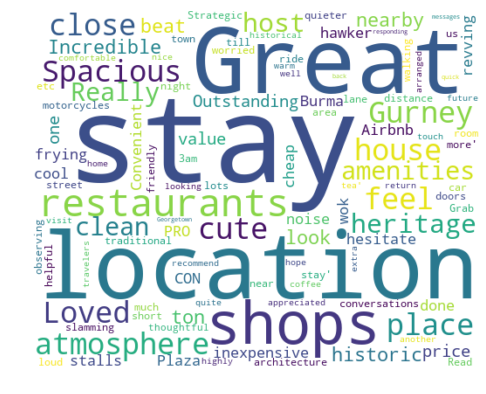

In [110]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

wordcloud  = WordCloud(width = 512, height = 412, background_color='white', max_words=500, stopwords=STOPWORDS)

wordcloud.generate(str(reviews))

plt.figure(figsize=(8,8)) # inches
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## NLP using NLTK for first room reviews

In [128]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))

sentences = sent_tokenize(str(reviews))
words = word_tokenize(str(reviews))

In [129]:
filtered=[]
for w in words:
    if w not in stop_words:
        filtered.append(w)

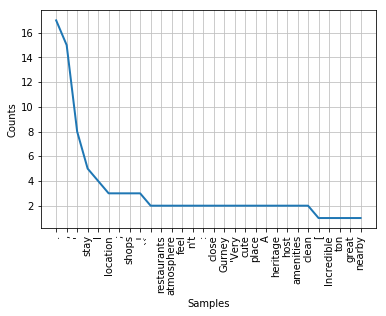

In [136]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

fdist= FreqDist(filtered)
fdist.plot(30,cumulative=False)

plt.show()